In [1]:
%pip install statsmodels
%pip install pandas
%pip install python-dotenv
%pip install seaborn
%pip install matplotlib
%pip install pyodbc
%pip install numpy
%pip install xlrd
%pip install openpyxl
%pip install sklearn
%pip install plotly
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing needed libraries

import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from dotenv import dotenv_values
import pyodbc
import os
import pickle
import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from statsmodels.tsa.ar_model import AutoReg, AR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score


from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.impute import  SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings('ignore')

In [3]:
#getting database credentials
environment_variables = dotenv_values('.env.txt')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('USERNAME')
password = environment_variables.get('PASSWORD')

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Using the connect method of the pyodbc library

connection = pyodbc.connect(connection_string)

In [5]:
#selecting table_1

query = "Select * from dbo.oil"
oil_data = pd.read_sql(query, connection)

In [6]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [7]:
oil_data.tail()

,date,dcoilwtico
1213,2017-08-25,47.650002
1214,2017-08-28,46.400002
1215,2017-08-29,46.459999
1216,2017-08-30,45.959999
1217,2017-08-31,47.259998


In [8]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [9]:
oil_data.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [10]:
#selecting table_2

query2 = "Select * from dbo.holidays_events"
hol_events = pd.read_sql(query2, connection)

In [11]:
hol_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [12]:
hol_events.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [13]:
hol_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [14]:
hol_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [15]:
# Iterate through each column and get unique values

unique_values_per_column = {}
for column in hol_events.columns:
    unique_values_per_column[column] = hol_events[column].unique()

# Print the unique values for each column
for column, unique_values in unique_values_per_column.items():
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'date': ['2012-03-02' '2012-04-01' '2012-04-12' '2012-04-14' '2012-04-21'
 '2012-05-12' '2012-06-23' '2012-06-25' '2012-07-03' '2012-07-23'
 '2012-08-05' '2012-08-10' '2012-08-15' '2012-08-24' '2012-09-28'
 '2012-10-07' '2012-10-09' '2012-10-12' '2012-11-02' '2012-11-03'
 '2012-11-06' '2012-11-07' '2012-11-10' '2012-11-11' '2012-11-12'
 '2012-12-05' '2012-12-06' '2012-12-08' '2012-12-21' '2012-12-22'
 '2012-12-23' '2012-12-24' '2012-12-25' '2012-12-26' '2012-12-31'
 '2013-01-01' '2013-01-05' '2013-01-12' '2013-02-11' '2013-02-12'
 '2013-03-02' '2013-04-01' '2013-04-12' '2013-04-14' '2013-04-21'
 '2013-04-29' '2013-05-01' '2013-05-11' '2013-05-12' '2013-05-24'
 '2013-06-23' '2013-06-25' '2013-07-03' '2013-07-23' '2013-07-24'
 '2013-07-25' '2013-08-05' '2013-08-10' '2013-08-15' '2013-08-24'
 '2013-09-28' '2013-10-07' '2013-10-09' '2013-10-11' '2013-11-02'
 '2013-11-03' '2013-11-06' '2013-11-07' '2013-11-10' '2013-11-11'
 '2013-11-12' '2013-12-05' '2013-12-06' '201

In [16]:
#selecting table3

query3 = "Select * from dbo.stores"
stores_data = pd.read_sql(query3, connection)

In [17]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [18]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [19]:
train_data = pd.read_csv('train.csv')
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [20]:
train_data.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [22]:
train_data['store_nbr'].nunique()

54

In [23]:
trans_data = pd.read_csv('transactions.csv')
trans_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [24]:
trans_data['store_nbr'].nunique()

54

In [25]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [26]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [27]:
sample_submission.tail()

,id,sales
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0
28511,3029399,0.0


In [28]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [29]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


#### BUSINESS UNDERSTANDING

##### PROJECT TITLE
A Trend Analysis on CORPORATION FAVORITA - An Ecudorian-based Grocery Retailer

##### PROJECT DESCRIPTION
In the rapidly evolving business environment of grocery retail, data-driven insights are paramount to success. This project focuses on the development of a predictive Machine Learning model that unravels the sales trends within Favorita's wide store network, providing valuable insights into  unit sales of various items, seasonal variations, impact of events, and store-specific behaviors.

Our aim is to provide FAVORITA with a more accurate sales prediction modelto enable them optimize inventory management, anticipate demand fluctuations, and strategically plan promotions.

#### Hypothesis:

H0: Changes in the price of oil and the presence of holidays affects amount of sales made by stores.

H1: The price of oil and the presence of holidays does not affect the amount of sales made by stores.

#### Data Mining Goals & Research Questions

SALES TRENDS

1. How have sales trends evolved over the years? Are there seasonality patterns?

2. How do promotions impact sales? Is there a significant spike in sales when products are on promotion?

3. What are the top 10 best/worst stores and their best selling products?

4. How do transactions correlate with sales? Do more transactions always mean higher sales?

HOLIDAYS&EVENTS ANALYSIS

5. How many holidays/events occur on a local, regional, or national scale?

6. How did the earthquake on April 16 2016 impact sales?

OIL PRICE ANALYSIS

7. What is the trend in oil prices over time?

8. Are there specific months or periods when oil prices spike or dip?

#### Exploratory Data Analysis

***train_data***

In [30]:
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


date is an object datatype. Let change it to datetime datatype


In [32]:
train_data['date'] = pd.to_datetime(train_data['date'])


train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


Now the 'date' column has been converted to datetime data type


Check for null values

In [33]:
train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

No null values in train_data

Check for outliers in sales column

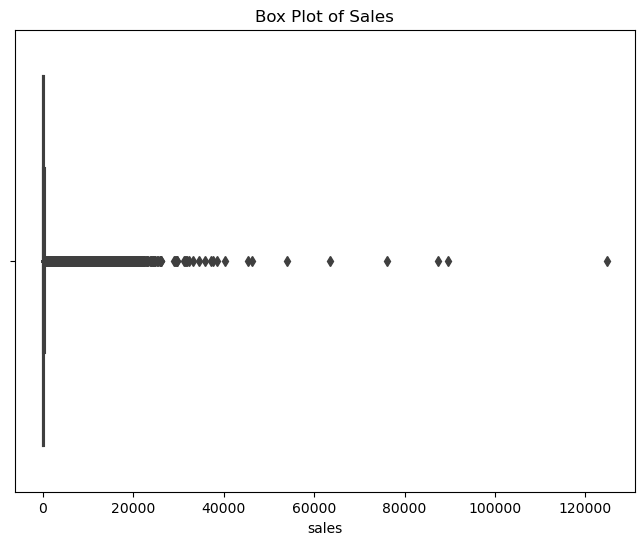

Number of outliers in 'sales' column: 447105


In [34]:
plt.figure(figsize=(8, 6))

# Create a box plot for the 'sales' column
sns.boxplot(x=train_data['sales'])
plt.title('Box Plot of Sales')
plt.show()

# Calculate the IQR for the 'sales' column
Q1 = train_data['sales'].quantile(0.25)
Q3 = train_data['sales'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (train_data['sales'] < (Q1 - 1.5 * IQR)) | (train_data['sales'] > (Q3 + 1.5 * IQR))

# Count the number of outliers
outlier_count = outliers.sum()

print("Number of outliers in 'sales' column:", outlier_count)

Checking for trend linearity

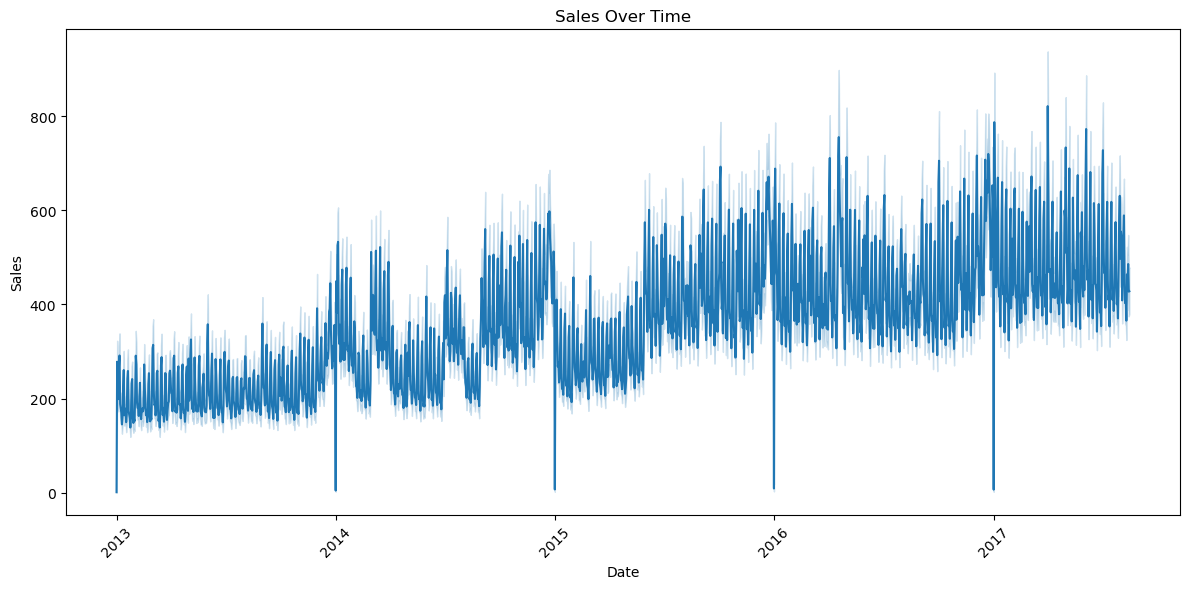

In [35]:
plt.figure(figsize=(12, 6))

# Create a line plot of sales over time
sns.lineplot(x='date', y='sales', data=train_data)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### As it is Shown in the above figure we see that there are seasonality patterns of sales over the years and often reflect changes in customer behavior, such as holiday shopping, weather-related preferences, or cultural events. By identifying these patterns, businesses can gain insights into their customers' buying habits and tailor marketing and product strategies accordingly.

Sales Distribution by Year

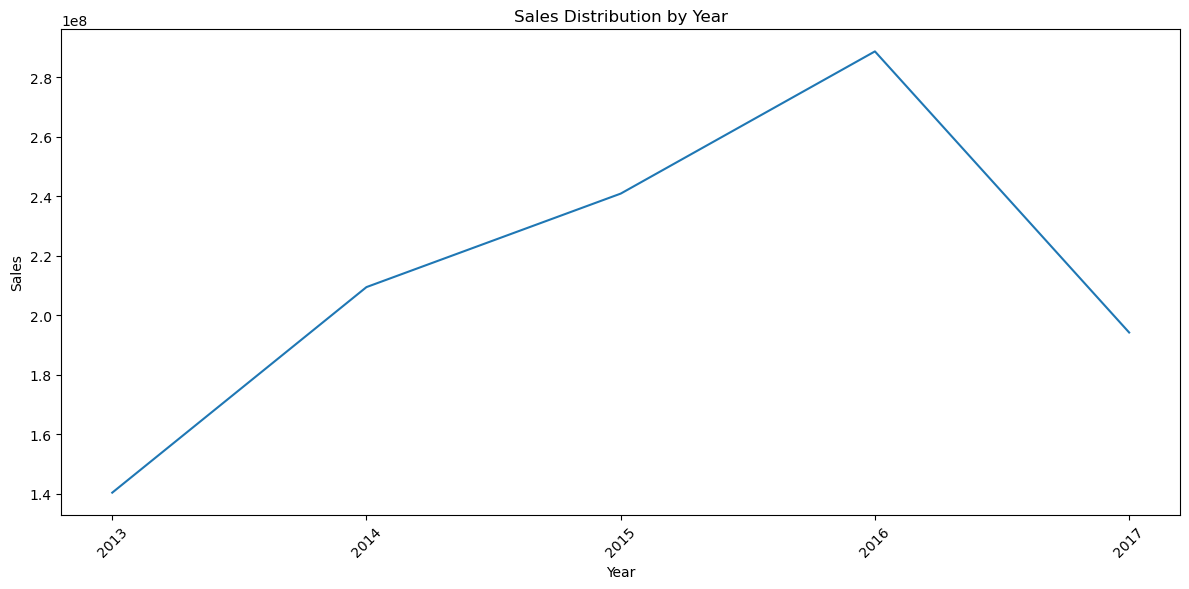

In [36]:
plt.figure(figsize=(12, 6))

# Extract the year from the 'date' column
train_data['year'] = train_data['date'].dt.year

# Group sales data by year and calculate the sum of sales for each year
sales_by_year = train_data.groupby('year')['sales'].sum().reset_index()

# Plot sales distribution by year
sns.lineplot(x='year', y='sales', data=sales_by_year)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Distribution by Year')
plt.xticks(sales_by_year['year'].astype(int), rotation=45)  # Convert years to integers
plt.tight_layout()
plt.show()

###### External factors such as global events, natural disasters, or political instability can have a profound impact on sales. An unforeseen event around 2016 might have disrupted supply chains, reduced consumer confidence, or affected business operations, leading to decreased sales.

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 160.3+ MB


***oil_data***

In [38]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [39]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


date is an object datatype. Let change it to datetime datatype

In [40]:
oil_data['date'] = pd.to_datetime(oil_data['date'])


oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


Now the 'date' column has been converted to datetime data type

Check for null values

In [41]:
oil_data.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

We have 43 missed values in dcoilwtico.

Let check for outliers.

In [42]:
column_name = 'dcoilwtico'

# Calculate the IQR
Q1 = oil_data[column_name].quantile(0.25)
Q3 = oil_data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = oil_data[(oil_data[column_name] < lower_bound) | (oil_data[column_name] > upper_bound)]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [date, dcoilwtico]
Index: []


No outliers.

The choice between using forward fill (ffill) and backward fill (bfill) for imputation.

In [43]:

# Histogram
histogram_fig = px.histogram(oil_data, x='dcoilwtico', nbins=30, title="Distribution of 'dcoilwtico'")
histogram_fig.show()

# Box Plot
boxplot_fig = px.box(oil_data, y='dcoilwtico', title="Box Plot of 'dcoilwtico'")
boxplot_fig.show()



# Convert 'date' column to datetime format
oil_data['date'] = pd.to_datetime(oil_data['date'])

# Create a time-series line chart with missing value markers
line_chart_fig = px.line(oil_data, x='date', y='dcoilwtico', title="Time-Series of 'dcoilwtico'",
                         markers=True, # Add markers at data points
                         line_shape='linear', # Linear line shape
                         )

# Add vertical lines to indicate missing values
missing_dates = oil_data[oil_data['dcoilwtico'].isnull()]['date']
for date in missing_dates:
    line_chart_fig.add_shape(type="line",
                             x0=date, x1=date,
                             y0=0, y1=1,
                             xref="x", yref="paper",
                             line=dict(color="red", dash="dash")
                             )
    line_chart_fig.add_annotation(text="", x=date, y=1.02, xref="x", yref="paper", showarrow=False)

line_chart_fig.update_xaxes(tickangle=45)
line_chart_fig.show()


If your time-series data exhibits both ups and downs, using interpolation methods, particularly linear interpolation, can be a more appropriate approach. Linear interpolation takes into account the changing trends and fluctuations in the data and can provide a more accurate imputation.

In [44]:
# Interpolate missing values using linear interpolation
oil_data['dcoilwtico'] = oil_data['dcoilwtico'].interpolate()

# Create a time-series line chart with missing value markers
line_chart_fig = px.line(oil_data, x='date', y='dcoilwtico', title="Time-Series of 'dcoilwtico'",
                         markers=True, # Add markers at data points
                         line_shape='linear', # Linear line shape
                         )

# Add vertical lines to indicate missing values
missing_dates = oil_data[oil_data['dcoilwtico'].isnull()]['date']
for date in missing_dates:
    line_chart_fig.add_shape(type="line",
                             x0=date, x1=date,
                             y0=0, y1=1,
                             xref="x", yref="paper",
                             line=dict(color="red", dash="dash")
                             )
    line_chart_fig.add_annotation(text="Missing Value", x=date, y=1.02, xref="x", yref="paper", showarrow=False)

line_chart_fig.update_xaxes(tickangle=45)
line_chart_fig.show()

The first missing value cannot be imputed using linear interpolation alone. Lets use bfill.

In [45]:
# Use backward filling to impute the first missing value
oil_data['dcoilwtico'] = oil_data['dcoilwtico'].fillna(method='bfill')
# Create a time-series line chart with missing value markers
line_chart_fig = px.line(oil_data, x='date', y='dcoilwtico', title="Time-Series of 'dcoilwtico'",
                         markers=True, # Add markers at data points
                         line_shape='linear', # Linear line shape
                         )

# Add vertical lines to indicate missing values
missing_dates = oil_data[oil_data['dcoilwtico'].isnull()]['date']
for date in missing_dates:
    line_chart_fig.add_shape(type="line",
                             x0=date, x1=date,
                             y0=0, y1=1,
                             xref="x", yref="paper",
                             line=dict(color="red", dash="dash")
                             )
    line_chart_fig.add_annotation(text="Missing Value", x=date, y=1.02, xref="x", yref="paper", showarrow=False)

line_chart_fig.update_xaxes(tickangle=45)
line_chart_fig.show()

Now we have no missing value.

In [46]:
oil_data.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

Rename 'dcoilwtico' to 'oil_price'

In [47]:
oil_data.rename(columns={'dcoilwtico': 'oil_price'}, inplace=True)
oil_data.head()

,date,oil_price
0,2013-01-01,93.139999
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


***stores***

In [48]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [49]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


There is no missing values.

Store Distrubution

<Figure size 1500x1200 with 0 Axes>

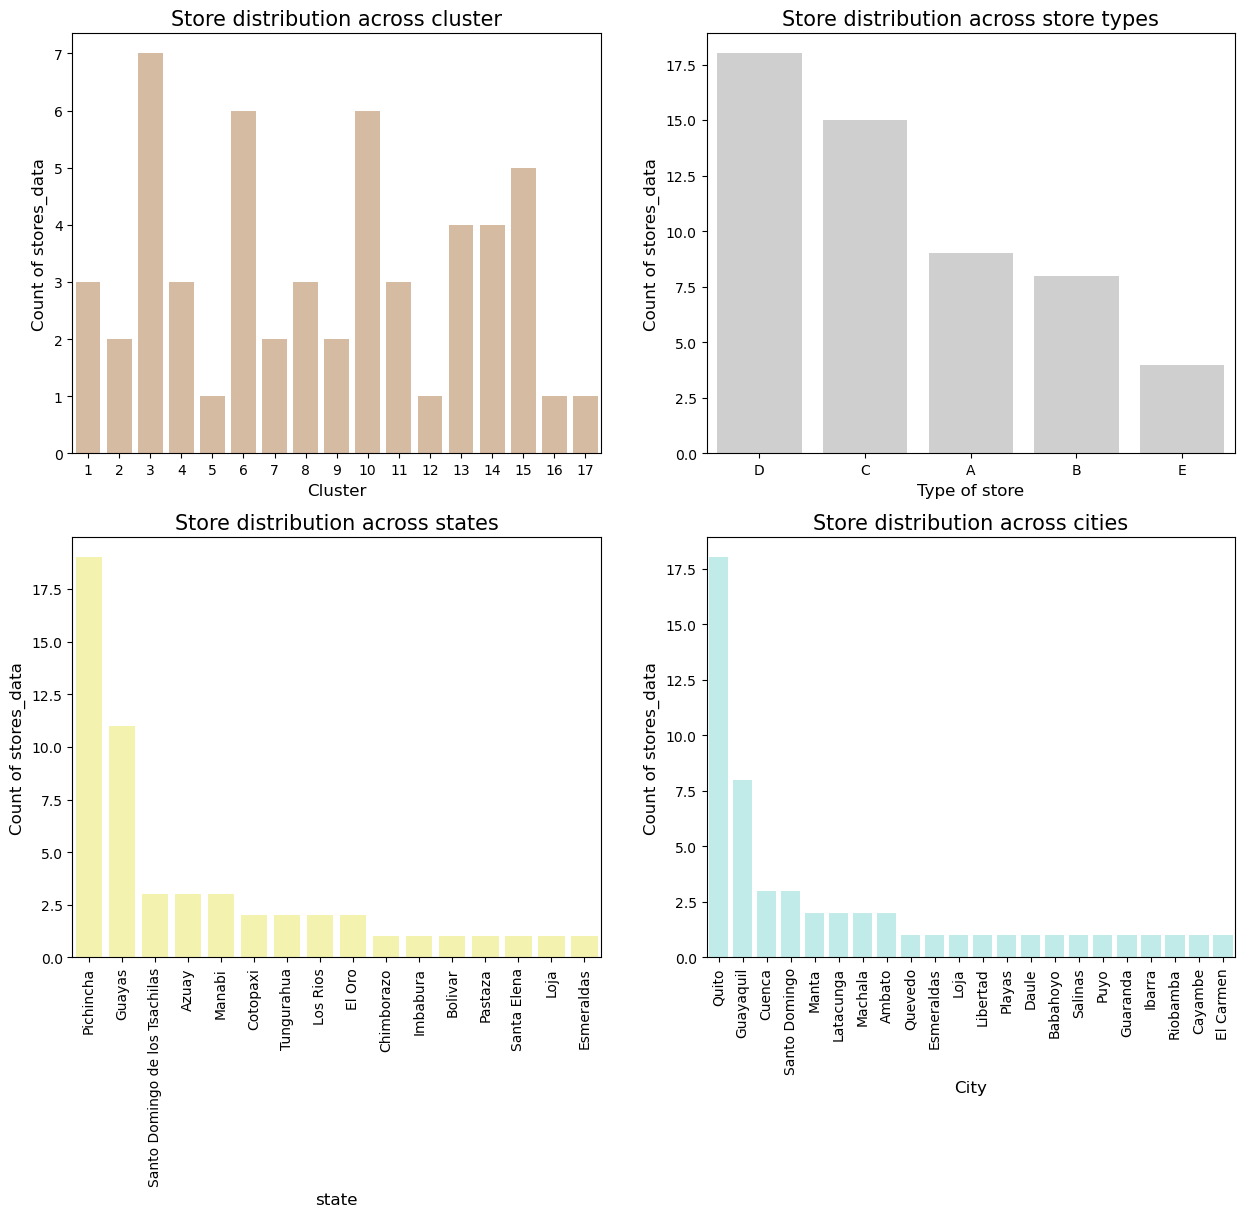

In [50]:
color = sns.color_palette("pastel")

plt.figure(figsize=(15, 12))

#Count of stores_data in different types and clusters
plt.figure(figsize=(15,12))
#row col plotnumber - 121
plt.subplot(221)
# Count of stores_data for each type 
temp = stores_data['cluster'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[5])
plt.ylabel('Count of stores_data', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.title('Store distribution across cluster', fontsize=15)

plt.subplot(222)
# Count of stores_data for each type 
temp = stores_data['type'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[7])
plt.ylabel('Count of stores_data', fontsize=12)
plt.xlabel('Type of store', fontsize=12)
plt.title('Store distribution across store types', fontsize=15)

plt.subplot(223)
# Count of stores_data for each type 
temp = stores_data['state'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[8])
plt.ylabel('Count of stores_data', fontsize=12)
plt.xlabel('state', fontsize=12)
plt.title('Store distribution across states', fontsize=15)
plt.xticks(rotation='vertical')

plt.subplot(224)
# Count of stores_data for each type 
temp = stores_data['city'].value_counts()
#plot
sns.barplot(temp.index,temp.values,color=color[9])
plt.ylabel('Count of stores_data', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.title('Store distribution across cities', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

***trans_data***

In [51]:
trans_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [52]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


date is an object. Let change to datetime datatype

In [53]:
trans_data['date'] = pd.to_datetime(trans_data['date'])


trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


Transactions by Store Number

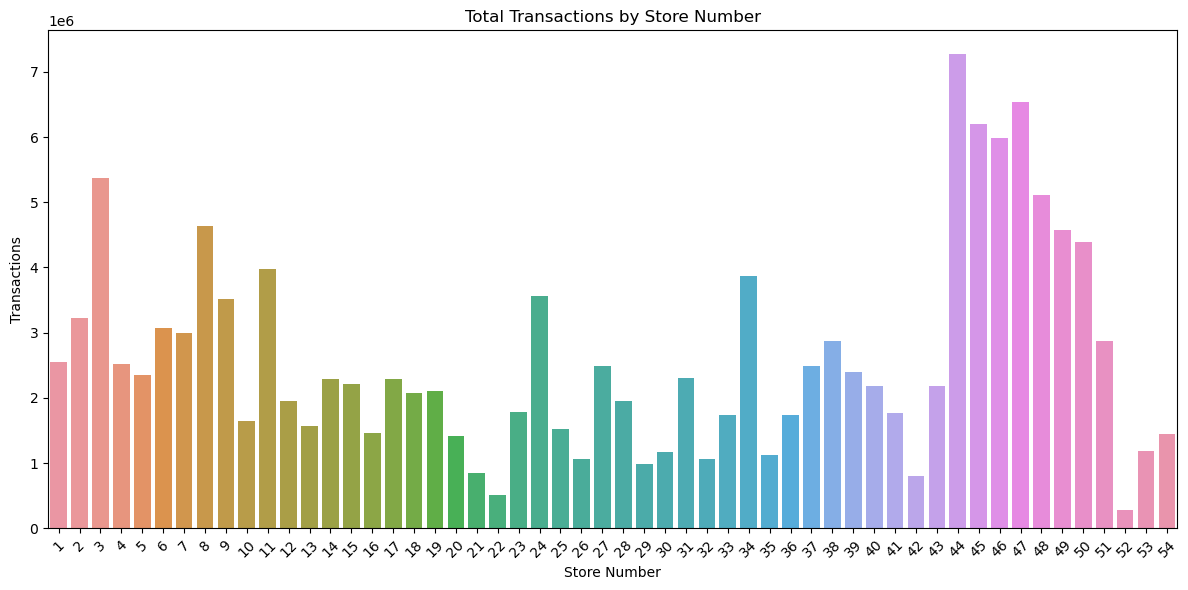

In [54]:
plt.figure(figsize=(12, 6))

# Group transactions by store number and calculate the total transactions for each store
store_transactions = trans_data.groupby('store_nbr')['transactions'].sum().reset_index()

# Plot transactions for each store number
sns.barplot(x='store_nbr', y='transactions', data=store_transactions)

plt.xlabel('Store Number')
plt.ylabel('Transactions')
plt.title('Total Transactions by Store Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

store number 44 is the one with most transactions while store number 52 is the one with low transactions.

Transactions Over date

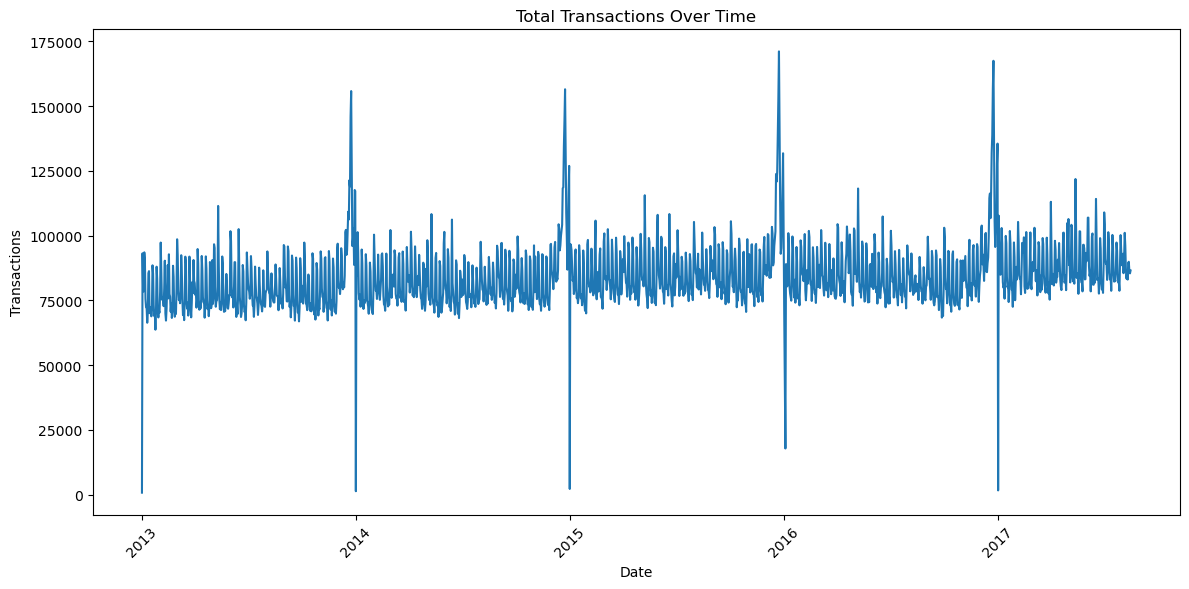

In [55]:
plt.figure(figsize=(12, 6))

# Group transactions by date and calculate the total transactions for each day
date_transactions = trans_data.groupby('date')['transactions'].sum().reset_index()

# Plot transactions over time
sns.lineplot(x='date', y='transactions', data=date_transactions)

plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Total Transactions Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**More transactions are made at the end of year (Maybe it's because of Chrismas), and very low transactions at the beginning of the year and we observe that sales really soar during the end of the year possibly due to the Navidad holiday and festivities and plummet again during the first week of the year. There's also a slight peak during the month of April, May , June. The sales for the rest of the year just oscillate between high and low. We can observe a seasonality at play.**.

***hol_events***

In [56]:
hol_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [57]:
hol_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


date is an object. Let change to datetime datatype

In [58]:
hol_events['date'] = pd.to_datetime(hol_events['date'])


hol_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


Transferred dates by Year

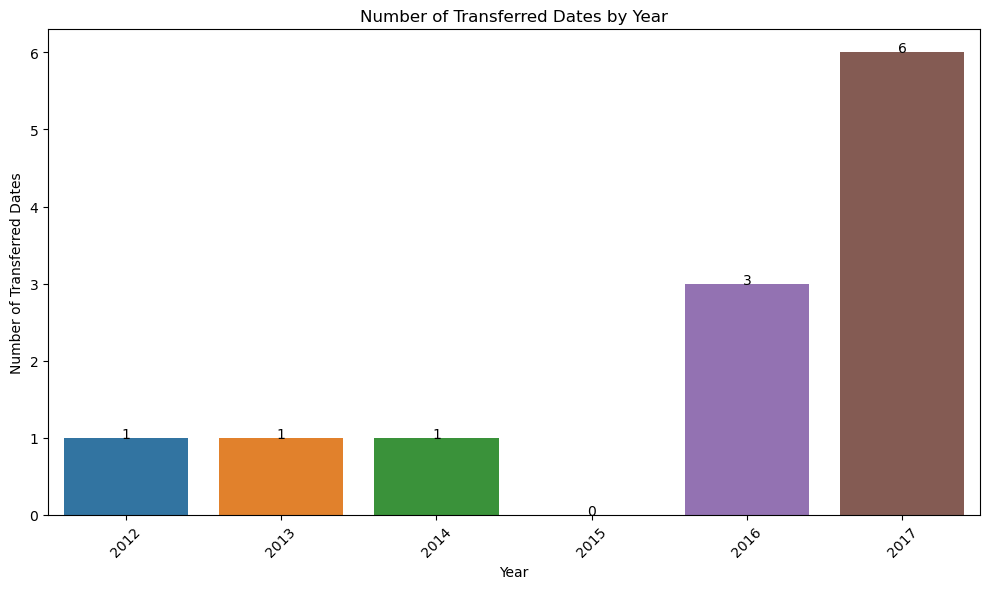

In [59]:
plt.figure(figsize=(10, 6))

# Extract the year from the 'date' column
hol_events['year'] = hol_events['date'].dt.year

# Group transferred data by year and count the number of transferred dates for each year
transferred_by_year = hol_events.groupby('year')['transferred'].sum().reset_index()

# Plot the number of transferred dates by year
sns.barplot(x='year', y='transferred', data=transferred_by_year)

plt.xlabel('Year')
plt.ylabel('Number of Transferred Dates')
plt.title('Number of Transferred Dates by Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate the bars with the actual numbers
for index, row in transferred_by_year.iterrows():
    plt.text(row.name, row.transferred, str(row.transferred), color='black', ha="center")

plt.show()

Holidays Distribution by Locale

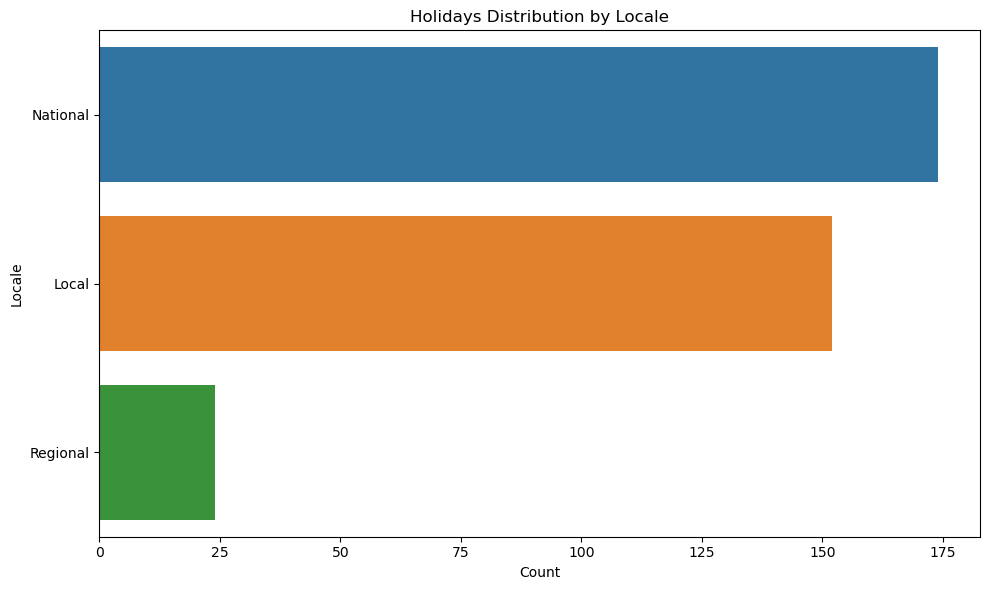

In [60]:
plt.figure(figsize=(10, 6))

# Group holidays data by locale and count the occurrences of each locale
holidays_by_locale = hol_events['locale'].value_counts().reset_index()

# Rename columns for clarity
holidays_by_locale.columns = ['locale', 'count']

# Plot the distribution of holidays by locale
sns.set_palette("tab10")  # Set color palette
sns.barplot(x='count', y='locale', data=holidays_by_locale)

plt.xlabel('Count')
plt.ylabel('Locale')
plt.title('Holidays Distribution by Locale')
plt.tight_layout()
plt.show()

Holidays Distribution by Locale Name

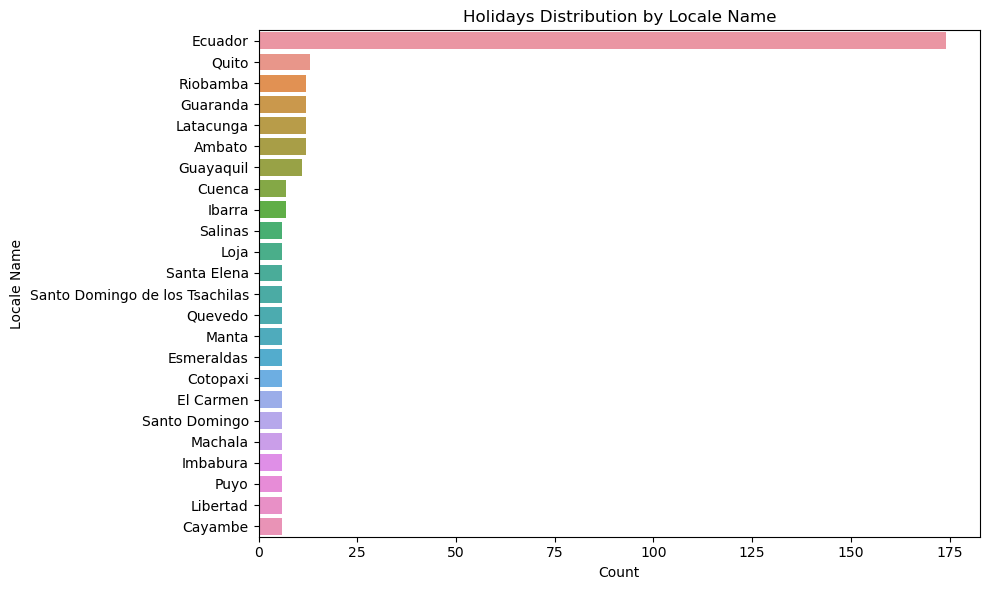

In [61]:
plt.figure(figsize=(10, 6))

# Group holidays data by locale_name and count the occurrences of each locale_name
holidays_by_locale_name = hol_events['locale_name'].value_counts().reset_index()

# Rename columns for clarity
holidays_by_locale_name.columns = ['locale_name', 'count']

# Plot the distribution of holidays by locale_name
sns.set_palette("tab10")  # Set color palette
sns.barplot(x='count', y='locale_name', data=holidays_by_locale_name)

plt.xlabel('Count')
plt.ylabel('Locale Name')
plt.title('Holidays Distribution by Locale Name')
plt.tight_layout()
plt.show()

Holidays Distribution by Type

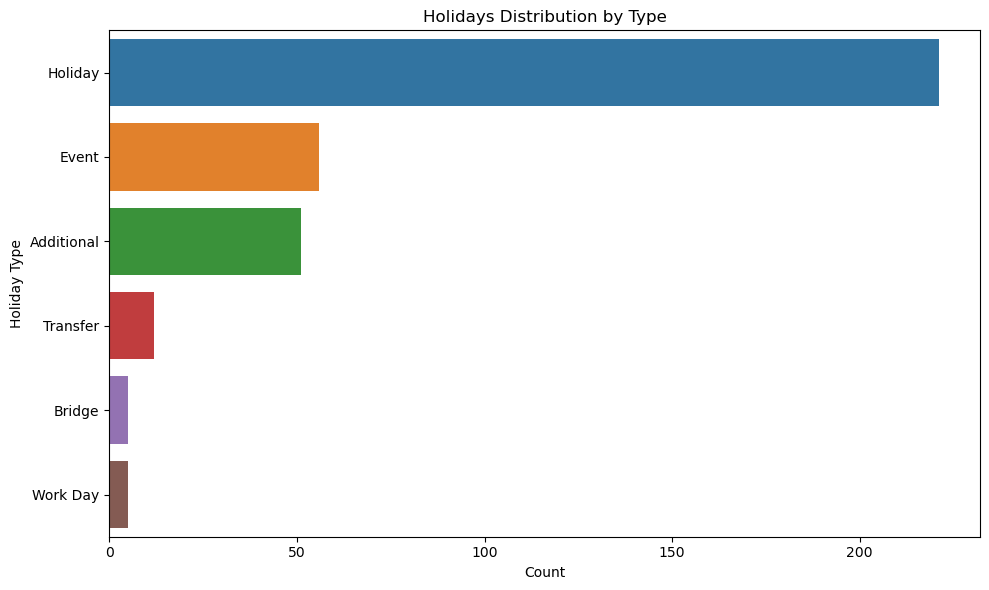

In [62]:
plt.figure(figsize=(10, 6))

# Group holidays data by type and count the occurrences of each type
holidays_by_type = hol_events['type'].value_counts().reset_index()

# Rename columns for clarity
holidays_by_type.columns = ['type', 'count']

# Plot the distribution of holidays by type
sns.set_palette("tab10")  # Set color palette
sns.barplot(x='count', y='type', data=holidays_by_type)

plt.xlabel('Count')
plt.ylabel('Holiday Type')
plt.title('Holidays Distribution by Type')
plt.tight_layout()
plt.show()

Holiday Types Distribution by Year

<Figure size 1200x600 with 0 Axes>

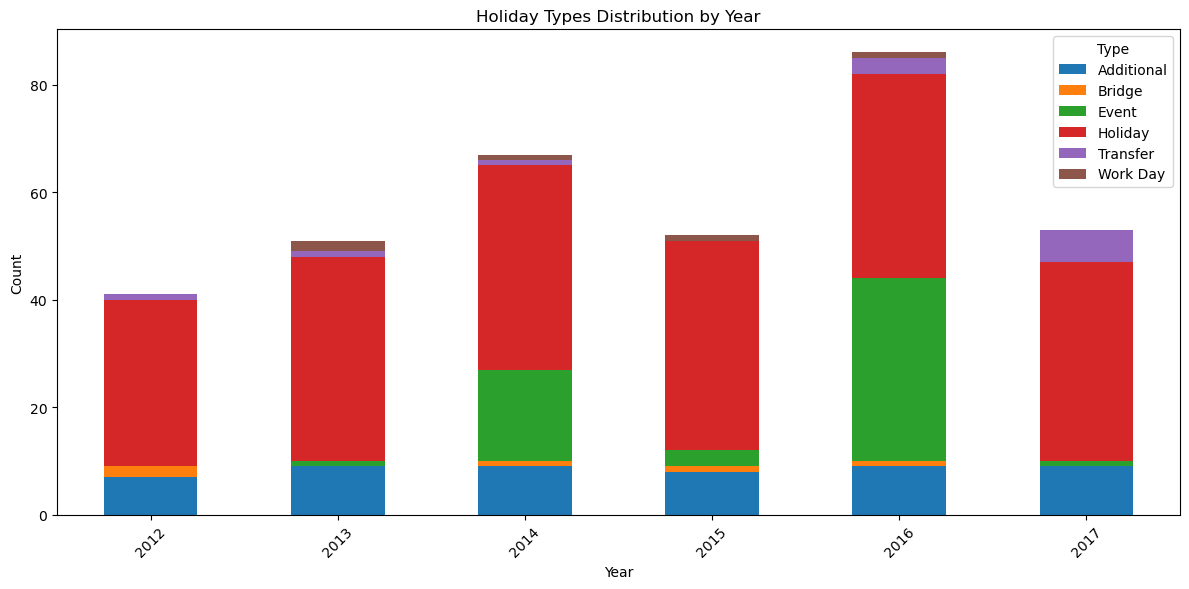

In [63]:
plt.figure(figsize=(12, 6))

# Extract the year from the 'date' column
hol_events['year'] =hol_events['date'].dt.year

# Group holidays data by year and type, then count the occurrences of each type in each year
holidays_by_year_type =hol_events.groupby(['year', 'type'])['type'].count().unstack().reset_index()

# Set the year column as the index for proper plotting
holidays_by_year_type.set_index('year', inplace=True)

# Plot the distribution of holiday types by year
sns.set_palette("tab10")  # Set color palette
holidays_by_year_type.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Holiday Types Distribution by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Type')
plt.show()

***test_data***

In [64]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


Let change date into date time.

In [66]:
test_data['date'] = pd.to_datetime(test_data['date'])


test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [67]:
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [68]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB


In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 160.3+ MB


In [70]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [71]:
# rename to easily identity columns after merging

stores_data.rename(columns={'city': 'store_city', 'state':'store_state',
                       'cluster':'store_cluster', 'type':'store_type'}, inplace=True)
hol_events.rename(columns={'type':'holiday_type',  
                               'description':'holiday_description'}, inplace=True)
oil_data.rename(columns={'dcoilwtico':'oil_price'}, inplace=True)

**Merge datasets**

- We merged the data set for improving the data Quality and to enrich context and insights and also have a more complete and holistic view and bahaviour on sales and other features in our data set.

In [72]:
train = pd.merge(train_data, oil_data, on='date', how='left')

# Merge the 'train' DataFrame (which now includes the 'oil_price' column) with the 'oil' DataFrame again based on the 'date' column using a left join
test = pd.merge(test_data, oil_data, on='date', how='left')

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
 7   oil_price    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 206.1+ MB


In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 160.3+ MB


In [75]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,year,oil_price
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,93.139999
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,93.139999
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,93.139999
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,93.139999
4,4,2013-01-01,1,BOOKS,0.0,0,2013,93.139999


In [76]:
test.head()

,id,date,store_nbr,family,onpromotion,oil_price
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.799999
1,3000889,2017-08-16,1,BABY CARE,0,46.799999
2,3000890,2017-08-16,1,BEAUTY,2,46.799999
3,3000891,2017-08-16,1,BEVERAGES,20,46.799999
4,3000892,2017-08-16,1,BOOKS,0,46.799999


In [77]:
## Store -> train, test
train =pd.merge(train,stores_data, on='store_nbr', how='left')
test =pd.merge(test,stores_data, on='store_nbr', how='left')

In [78]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,year,oil_price,store_city,store_state,store_type,store_cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,93.139999,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,93.139999,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,93.139999,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,93.139999,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,2013,93.139999,Quito,Pichincha,D,13


In [79]:
test.head()

,id,date,store_nbr,family,onpromotion,oil_price,store_city,store_state,store_type,store_cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.799999,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,46.799999,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,46.799999,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,46.799999,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,46.799999,Quito,Pichincha,D,13


In [80]:
train.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
year                  0
oil_price        857142
store_city            0
store_state           0
store_type            0
store_cluster         0
dtype: int64

In [81]:
test.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
oil_price        7128
store_city          0
store_state         0
store_type          0
store_cluster       0
dtype: int64

In [82]:
trans_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [83]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,year,oil_price,store_city,store_state,store_type,store_cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,93.139999,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,93.139999,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,93.139999,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,93.139999,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,2013,93.139999,Quito,Pichincha,D,13


In [84]:
hol_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 350 non-null    datetime64[ns]
 1   holiday_type         350 non-null    object        
 2   locale               350 non-null    object        
 3   locale_name          350 non-null    object        
 4   holiday_description  350 non-null    object        
 5   transferred          350 non-null    bool          
 6   year                 350 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 16.9+ KB


In [85]:
train =pd.merge(train, hol_events, on='date', how='left')

test = pd.merge(test, hol_events, on='date', how='left')

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id                   int64         
 1   date                 datetime64[ns]
 2   store_nbr            int64         
 3   family               object        
 4   sales                float64       
 5   onpromotion          int64         
 6   year_x               int64         
 7   oil_price            float64       
 8   store_city           object        
 9   store_state          object        
 10  store_type           object        
 11  store_cluster        int64         
 12  holiday_type         object        
 13  locale               object        
 14  locale_name          object        
 15  holiday_description  object        
 16  transferred          object        
 17  year_y               float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(9)
memory u

In [87]:
train.isnull().sum()

id                           0
date                         0
store_nbr                    0
family                       0
sales                        0
onpromotion                  0
year_x                       0
oil_price               878526
store_city                   0
store_state                  0
store_type                   0
store_cluster                0
holiday_type           2551824
locale                 2551824
locale_name            2551824
holiday_description    2551824
transferred            2551824
year_y                 2551824
dtype: int64

In [88]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,year_x,oil_price,store_city,store_state,store_type,store_cluster,holiday_type,locale,locale_name,holiday_description,transferred,year_y
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013.0
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013.0
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013.0
4,4,2013-01-01,1,BOOKS,0.0,0,2013,93.139999,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,2013.0


In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   28512 non-null  int64         
 1   date                 28512 non-null  datetime64[ns]
 2   store_nbr            28512 non-null  int64         
 3   family               28512 non-null  object        
 4   onpromotion          28512 non-null  int64         
 5   oil_price            21384 non-null  float64       
 6   store_city           28512 non-null  object        
 7   store_state          28512 non-null  object        
 8   store_type           28512 non-null  object        
 9   store_cluster        28512 non-null  int64         
 10  holiday_type         1782 non-null   object        
 11  locale               1782 non-null   object        
 12  locale_name          1782 non-null   object        
 13  holiday_description  1782 non-n

In [90]:
test.isna().sum()

id                         0
date                       0
store_nbr                  0
family                     0
onpromotion                0
oil_price               7128
store_city                 0
store_state                0
store_type                 0
store_cluster              0
holiday_type           26730
locale                 26730
locale_name            26730
holiday_description    26730
transferred            26730
year                   26730
dtype: int64

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   28512 non-null  int64         
 1   date                 28512 non-null  datetime64[ns]
 2   store_nbr            28512 non-null  int64         
 3   family               28512 non-null  object        
 4   onpromotion          28512 non-null  int64         
 5   oil_price            21384 non-null  float64       
 6   store_city           28512 non-null  object        
 7   store_state          28512 non-null  object        
 8   store_type           28512 non-null  object        
 9   store_cluster        28512 non-null  int64         
 10  holiday_type         1782 non-null   object        
 11  locale               1782 non-null   object        
 12  locale_name          1782 non-null   object        
 13  holiday_description  1782 non-n

In [92]:
train['oil_price'].fillna(method='ffill', inplace=True)

train['holiday_type'].fillna('No Event', inplace=True)

train['locale'].fillna('N/A', inplace=True)

train['locale_name'].fillna('N/A', inplace=True)

train['holiday_description'].fillna('N/A', inplace=True)

train['transferred'].fillna('N/A', inplace=True)
train['year_y'].fillna('N/A', inplace=True)

In [93]:
train.isna().sum()

id                     0
date                   0
store_nbr              0
family                 0
sales                  0
onpromotion            0
year_x                 0
oil_price              0
store_city             0
store_state            0
store_type             0
store_cluster          0
holiday_type           0
locale                 0
locale_name            0
holiday_description    0
transferred            0
year_y                 0
dtype: int64

In [94]:
test['oil_price'].fillna(method='ffill', inplace=True)

test['holiday_type'].fillna('No Event', inplace=True)

test['locale'].fillna('N/A', inplace=True)

test['locale_name'].fillna('N/A', inplace=True)

test['holiday_description'].fillna('N/A', inplace=True)

test['transferred'].fillna('N/A', inplace=True)
test['year'].fillna('N/A', inplace=True)

In [95]:
test.isna().sum()

id                     0
date                   0
store_nbr              0
family                 0
onpromotion            0
oil_price              0
store_city             0
store_state            0
store_type             0
store_cluster          0
holiday_type           0
locale                 0
locale_name            0
holiday_description    0
transferred            0
year                   0
dtype: int64

#### Feature selection

In [96]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year_x',
       'oil_price', 'store_city', 'store_state', 'store_type', 'store_cluster',
       'holiday_type', 'locale', 'locale_name', 'holiday_description',
       'transferred', 'year_y'],
      dtype='object')

In [97]:
train.drop([ 'store_state', 'store_type', 'store_cluster',
       'locale', 'locale_name', 'holiday_description',
       'transferred', 'year_y', 'year_x'], axis=1, inplace=True)

In [98]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'oil_price', 'store_city', 'holiday_type'],
      dtype='object')

In [99]:
test.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'oil_price',
       'store_city', 'store_state', 'store_type', 'store_cluster',
       'holiday_type', 'locale', 'locale_name', 'holiday_description',
       'transferred', 'year'],
      dtype='object')

In [100]:
test.drop([ 'store_state', 'store_type', 'store_cluster',
       'locale', 'locale_name', 'holiday_description',
       'transferred', 'year'], axis=1, inplace=True)

In [101]:
test.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'oil_price',
       'store_city', 'holiday_type'],
      dtype='object')

### handling missing values


In [102]:
train.isnull().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
oil_price       0
store_city      0
holiday_type    0
dtype: int64

In [103]:
test.isnull().sum()

id              0
date            0
store_nbr       0
family          0
onpromotion     0
oil_price       0
store_city      0
holiday_type    0
dtype: int64

No missing values.

### Handling outliers

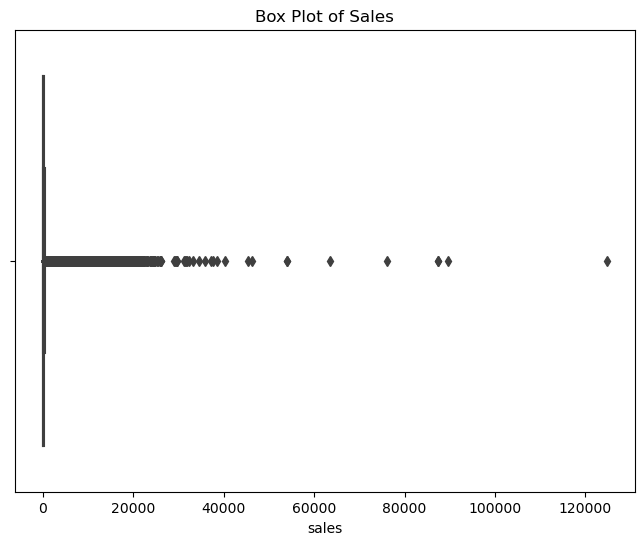

Number of outliers in 'sales' column: 455506


In [104]:
plt.figure(figsize=(8, 6))

# Create a box plot for the 'sales' column
sns.boxplot(x=train['sales'])
plt.title('Box Plot of Sales')
plt.show()

# Calculate the IQR for the 'sales' column
Q1 = train['sales'].quantile(0.25)
Q3 = train['sales'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = (train['sales'] < (Q1 - 1.5 * IQR)) | (train['sales'] > (Q3 + 1.5 * IQR))

# Count the number of outliers
outlier_count = outliers.sum()

print("Number of outliers in 'sales' column:", outlier_count)

Winsorization:

Instead of removing outliers, consider winsorizing the data. Winsorization involves replacing extreme values with less extreme values, effectively capping the outliers. This reduces the influence of outliers while retaining their presence in the dataset.


In [105]:
# Define the lower and upper percentile thresholds
lower_percentile = 5  # You can adjust this threshold
upper_percentile = 95  # You can adjust this threshold

# Calculate the lower and upper percentile values
lower_threshold = np.percentile(train['sales'], lower_percentile)
upper_threshold = np.percentile(train['sales'], upper_percentile)

# Apply Winsorization to the 'feature' column
train['feature_winsorized'] = np.where(train['sales'] < lower_threshold, lower_threshold, train['sales'])
train['feature_winsorized'] = np.where(train['feature_winsorized'] > upper_threshold, upper_threshold, train['feature_winsorized'])

In [106]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'oil_price', 'store_city', 'holiday_type', 'feature_winsorized'],
      dtype='object')

### One-hot-encoding

In [107]:
print(train.columns)  # Print the column names before dropping
# train = train.drop(columns=cat_col)
# print(train.columns) 

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'oil_price', 'store_city', 'holiday_type', 'feature_winsorized'],
      dtype='object')


In [108]:
print(test.columns)

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'oil_price',
       'store_city', 'holiday_type'],
      dtype='object')


In [109]:
cat_col = ['family','store_city','holiday_type']


train = pd.get_dummies(train, columns=cat_col)

# train = train.drop(columns=cat_col)

# train = pd.concat([train, one_hot_encoded], axis=1)

In [110]:
tescat_col = ['family','store_city','holiday_type']


testencoded = pd.get_dummies(test, columns=tescat_col)

In [111]:
train .head()

,id,date,store_nbr,sales,onpromotion,oil_price,feature_winsorized,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,...,store_city_Riobamba,store_city_Salinas,store_city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_No Event,holiday_type_Transfer,holiday_type_Work Day
0,0,2013-01-01,1,0.0,0,93.139999,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,2013-01-01,1,0.0,0,93.139999,0.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2013-01-01,1,0.0,0,93.139999,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,3,2013-01-01,1,0.0,0,93.139999,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,2013-01-01,1,0.0,0,93.139999,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [112]:
testencoded.head()

,id,date,store_nbr,onpromotion,oil_price,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,store_city_Manta,store_city_Playas,store_city_Puyo,store_city_Quevedo,store_city_Quito,store_city_Riobamba,store_city_Salinas,store_city_Santo Domingo,holiday_type_Holiday,holiday_type_No Event
0,3000888,2017-08-16,1,0,46.799999,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,3000889,2017-08-16,1,0,46.799999,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3000890,2017-08-16,1,2,46.799999,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3000891,2017-08-16,1,20,46.799999,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,3000892,2017-08-16,1,0,46.799999,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### Feature scaling

In [113]:
num_col = ['id', 'store_nbr', 'sales', 'onpromotion', 'oil_price',
       'feature_winsorized', 'year']

In [114]:
tesnum_col = ['id', 'store_nbr', 'onpromotion', 'oil_price', 'year']

In [115]:

minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(train,col):
  for i in col:
    arr = train[i]
    arr = np.array(arr)
    train[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return train

In [116]:
tesminmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(testencoded,col):
  for i in col:
    arr = testencoded[i]
    arr = np.array(arr)
    testencoded[i] = tesminmax_scale.fit_transform(arr.reshape(len(arr),1))
  return testencoded

In [117]:

train.head()

,id,date,store_nbr,sales,onpromotion,oil_price,feature_winsorized,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,...,store_city_Riobamba,store_city_Salinas,store_city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_No Event,holiday_type_Transfer,holiday_type_Work Day
0,0,2013-01-01,1,0.0,0,93.139999,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,2013-01-01,1,0.0,0,93.139999,0.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2013-01-01,1,0.0,0,93.139999,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,3,2013-01-01,1,0.0,0,93.139999,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,2013-01-01,1,0.0,0,93.139999,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [118]:
test.head()

,id,date,store_nbr,family,onpromotion,oil_price,store_city,holiday_type
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.799999,Quito,No Event
1,3000889,2017-08-16,1,BABY CARE,0,46.799999,Quito,No Event
2,3000890,2017-08-16,1,BEAUTY,2,46.799999,Quito,No Event
3,3000891,2017-08-16,1,BEVERAGES,20,46.799999,Quito,No Event
4,3000892,2017-08-16,1,BOOKS,0,46.799999,Quito,No Event


**Resampling** 
- Resampling is a technique used in time series analysis to change the frequency of your data, typically from a higher frequency to a lower frequency (downsampling) or from a lower frequency to a higher frequency (upsampling).
- Since we’re working with time series data, we need to convert the data into a time series format. We can do this by setting the index of the dataframe to the datetime format.

In [119]:
# Convert the 'date' column to a datetime object
train['date'] = pd.to_datetime(train['date'])

# Set the 'date' column as the index
train.set_index('date', inplace=True) 

# Resample data to weekly frequency and aggregate by taking the sum
df_resample = train.resample('D').sum()

In [120]:
# Convert the 'date' column to a datetime object
testencoded['date'] = pd.to_datetime(testencoded['date'])

# Set the 'date' column as the index
testencoded.set_index('date', inplace=True) 

# Resample data to weekly frequency and aggregate by taking the sum
test_resample = testencoded.resample('D').sum()

In [121]:
df_resample.columns

Index(['id', 'store_nbr', 'sales', 'onpromotion', 'oil_price',
       'feature_winsorized', 'family_AUTOMOTIVE', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_

In [122]:
test_resample.columns

Index(['id', 'store_nbr', 'onpromotion', 'oil_price', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', 'store_city_El Carmen',
      

**Trend and Seasonal, and Decomposition Analysis**

Component Analysis helps us to understand the underlying patterns and structures within the data.
##### Trend Component:captures the overall direction in which the data is moving, whether it's increasing, decreasing, or remaining relatively stable over time.
##### Seasonal component: Seasonal decomposition helps in isolating these regular variations, making it easier to understand and model the impact of seasonality on the data. 
##### Residual Component:The residual component, also known as the error or noise component, captures the random fluctuations or irregularities in the time series data that cannot be explained by the trend or seasonal patterns.

Observed Component:
date
2013-01-01      2511.618999
2013-01-02    353259.417944
2013-01-03    294267.231124
2013-01-04    290671.704093
2013-01-05    346113.121229
Freq: D, Name: feature_winsorized, dtype: float64
Trend Component:
date
2013-01-01      2511.618999
2013-01-02    353259.417944
2013-01-03    294267.231124
2013-01-04    290671.704093
2013-01-05    346113.121229
Freq: D, Name: trend, dtype: float64
Seasonal Component:
date
2013-01-01    0.0
2013-01-02    0.0
2013-01-03    0.0
2013-01-04    0.0
2013-01-05    0.0
Freq: D, Name: seasonal, dtype: float64
Residual Component:
date
2013-01-01    0.0
2013-01-02    0.0
2013-01-03    0.0
2013-01-04    0.0
2013-01-05    0.0
Freq: D, Name: resid, dtype: float64


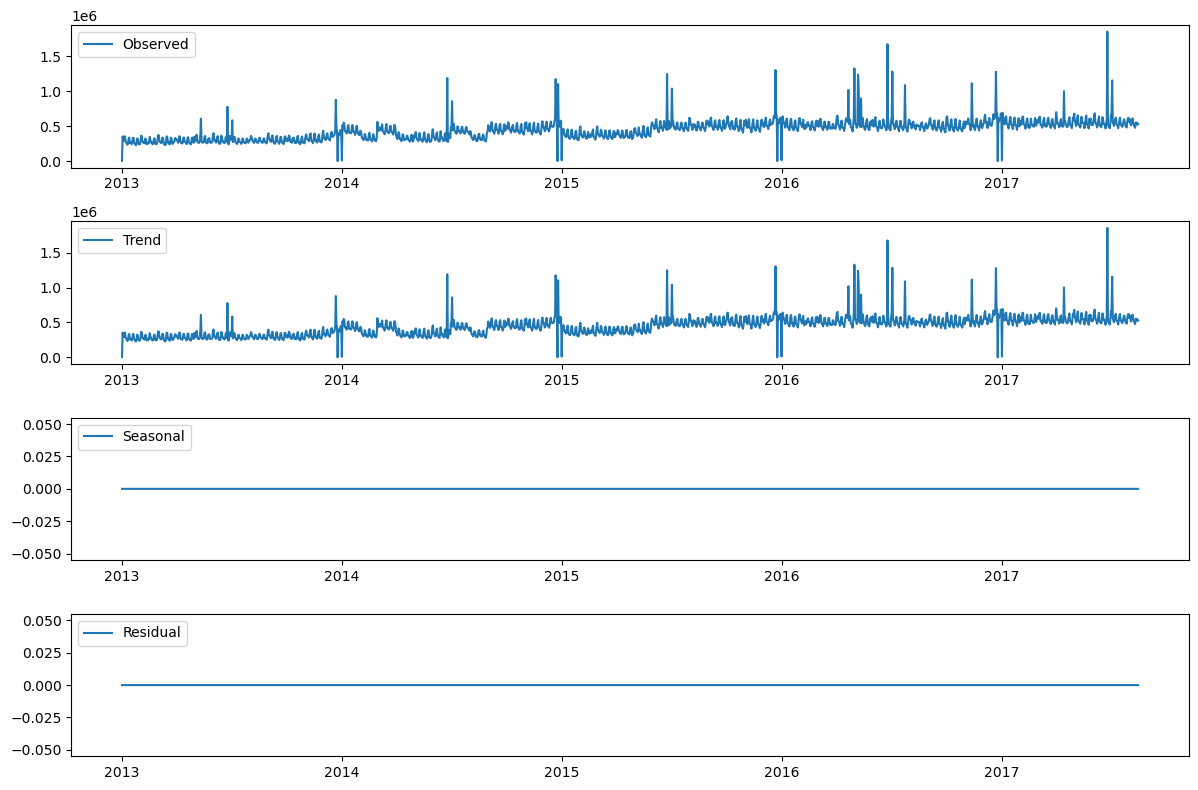

In [123]:
# Specify a monthly frequency ('W') for your data (optional, as it's already resampled)
df_resample = df_resample.asfreq('D')

# Perform seasonal decomposition
result = seasonal_decompose(df_resample['feature_winsorized'], model='additive', period=1)  # Specify a period of 1 for Weekly data

# Plot the seasonal decomposition components
plt.figure(figsize=(12, 8))

# Observed component
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
print("Observed Component:")
print(result.observed.head())  # Print the first few rows of the observed component

# Trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
print("Trend Component:")
print(result.trend.head())  # Print the first few rows of the trend component

# Seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
print("Seasonal Component:")
print(result.seasonal.head())  # Print the first few rows of the seasonal component

# Residual component
plt.subplot(414)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
print("Residual Component:")
print(result.resid.head())  # Print the first few rows of the residual component

plt.tight_layout()
plt.show()

##### Autocorrelation Analysis

- ACF and PACF plots: After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series. Of course, with software like Statgraphics, you could just try some different combinations of terms and see what works best. But there is a more systematic way to do this. By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

- Autocorrelation Function (ACF): P = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series. P corresponds with MA parameter
- Partial Autocorrelation Function (PACF): D = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary. D corresponds with AR parameter.
Autocorrelation plots help in detecting seasonality.

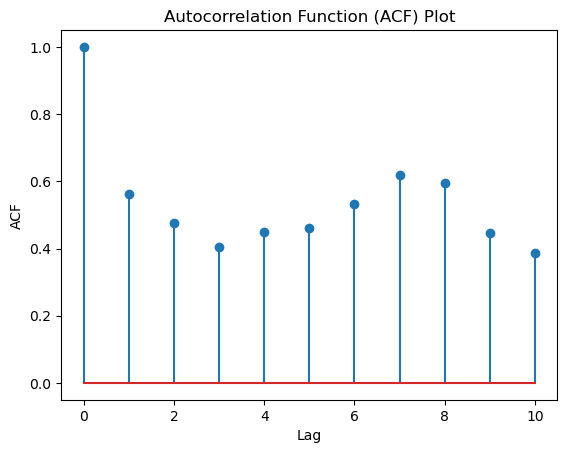

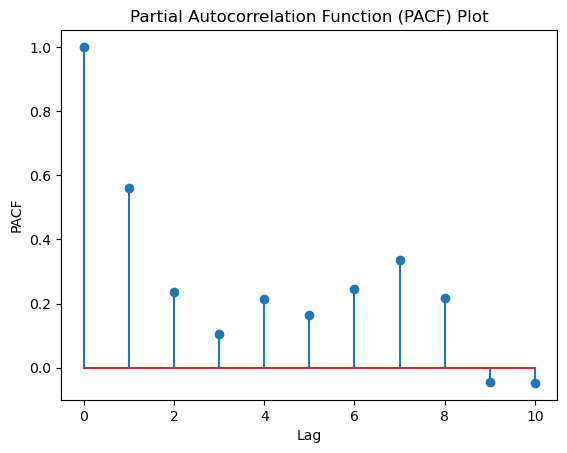

In [124]:
# Extract the time series data 
time_series = df_resample['feature_winsorized']

# Set the number of lags you want to consider in the ACF and PACF plots
lags = 10  # Adjust as needed

# Compute ACF
acf = sm.tsa.acf(time_series, nlags=lags)

# Create ACF plot
plt.stem(range(lags + 1), acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

# Compute PACF
pacf = sm.tsa.pacf(time_series, nlags=lags)

# Create PACF plot
plt.stem(range(lags + 1), pacf)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()
     

In [125]:
df_resample.columns

Index(['id', 'store_nbr', 'sales', 'onpromotion', 'oil_price',
       'feature_winsorized', 'family_AUTOMOTIVE', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_

In [126]:
#resample method automatically incluedes and interpolates for missing dates. 


daily_sales = df_resample['feature_winsorized'].resample('D').sum().reset_index(name='daily_sales').set_index('date')
df_resample['year'] = df_resample.index.year
df_resample

,id,store_nbr,sales,onpromotion,oil_price,feature_winsorized,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,...,store_city_Salinas,store_city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_No Event,holiday_type_Transfer,holiday_type_Work Day,year
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1586871,49005,2511.618999,0,165975.478912,2511.618999,54,54,54,54,...,33,99,0,0,0,1782,0,0,0,2013
2013-01-02,4762395,49005,496092.417944,0,165975.478912,353259.417944,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2013
2013-01-03,7937919,49005,361461.231124,0,165672.542175,294267.231124,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2013
2013-01-04,11113443,49005,354459.677093,0,165939.844894,290671.704093,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2013
2013-01-05,14288967,49005,477350.121229,0,165939.844894,346113.121229,54,54,54,54,...,33,99,0,0,0,0,0,0,1782,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5333291667,49005,826373.722022,14179,86979.422447,552298.562022,54,54,54,54,...,33,99,0,0,0,0,0,1782,0,2017
2017-08-12,5336467191,49005,792630.535079,8312,86979.422447,533327.707179,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2017
2017-08-13,5339642715,49005,865639.677471,9283,86979.422447,552033.704071,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2017


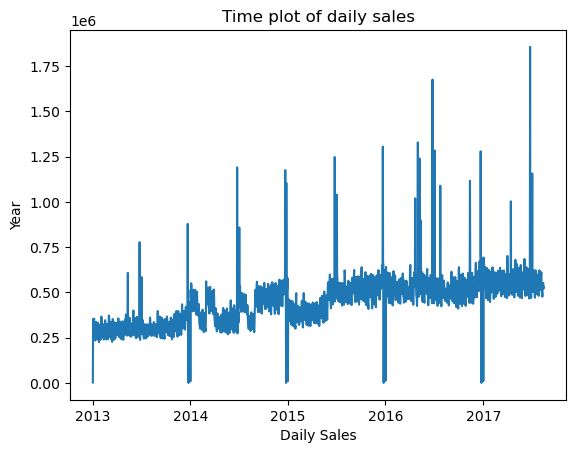

In [127]:
fig, ax = plt.subplots()

ax.plot(daily_sales.index, daily_sales.daily_sales)
ax.set_title('Time plot of daily sales')
ax.set_ylabel('Year')
ax.set_xlabel('Daily Sales');

+ There's some seasonality in the data:
    - there's a dip in prices at the start of the year
    - a rise in the middle and at the end of the year. 
+ an upward trend is also somewhat visible.

#### Moving Average Plots
+ we use MA plots to smooth out the fluctuations in our data to help us see the kind of trend, if any, we have. 
+ we'll plot by year to clearly see the trend

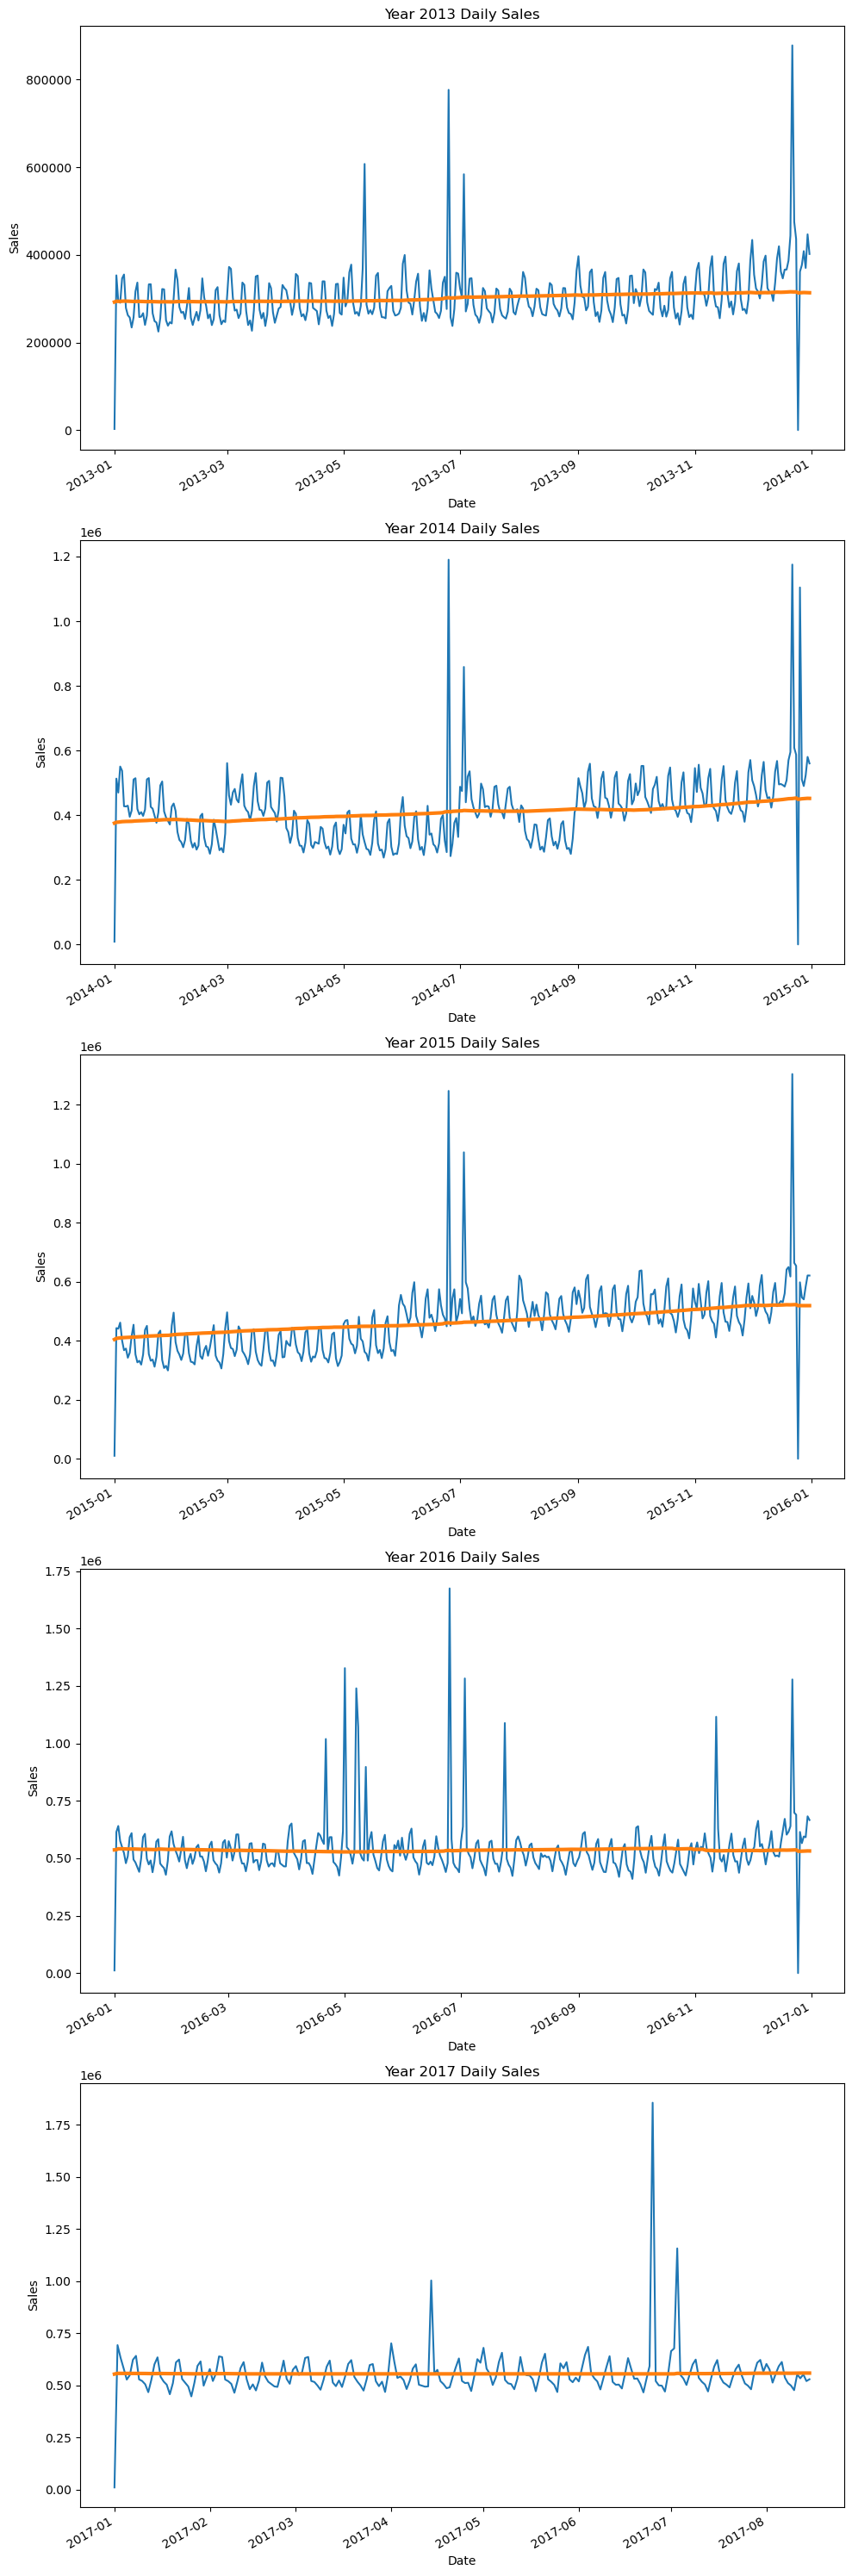

In [128]:
grouped = df_resample.groupby('year')

# Create a new figure and plot each year's daily sales on a new axis
fig, axes = plt.subplots(len(grouped), figsize=(10, 6 * len(grouped)))

for i, (year, group) in enumerate(grouped):
    ax = axes[i]
    ax.plot(group.index, group['feature_winsorized'])
    
    moving_average = group['feature_winsorized'].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
    ).mean()        

    moving_average.plot(
    ax=ax, linewidth=3, title=" 365-Day Moving Average", legend=False
    )

    
    ax.set_title(f"Year {year} Daily Sales")
    ax.set_xlabel("Date")
    ax.set_ylabel("Sales")

plt.tight_layout()
plt.show()

<Axes: xlabel='date'>

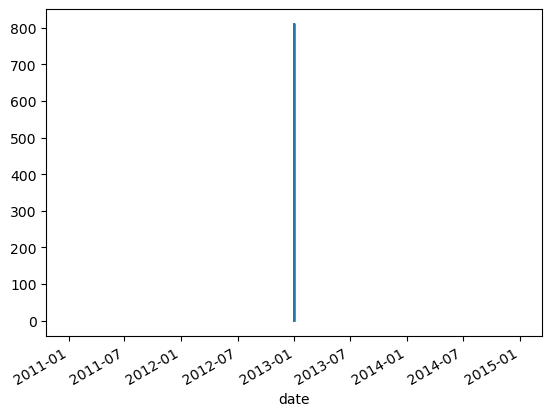

In [129]:
# visualize the values on day level 
train.loc['2013-01-01', 'sales'].plot()

In [130]:
len(train)

3054348

In [131]:
duplicate_indices = train.index[train.index.duplicated()]
print(duplicate_indices)


DatetimeIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01',
               ...
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
               '2017-08-15', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=3052664, freq=None)


In [132]:
len(train)

3054348

In [133]:
df_resample

,id,store_nbr,sales,onpromotion,oil_price,feature_winsorized,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,...,store_city_Salinas,store_city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_No Event,holiday_type_Transfer,holiday_type_Work Day,year
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1586871,49005,2511.618999,0,165975.478912,2511.618999,54,54,54,54,...,33,99,0,0,0,1782,0,0,0,2013
2013-01-02,4762395,49005,496092.417944,0,165975.478912,353259.417944,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2013
2013-01-03,7937919,49005,361461.231124,0,165672.542175,294267.231124,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2013
2013-01-04,11113443,49005,354459.677093,0,165939.844894,290671.704093,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2013
2013-01-05,14288967,49005,477350.121229,0,165939.844894,346113.121229,54,54,54,54,...,33,99,0,0,0,0,0,0,1782,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5333291667,49005,826373.722022,14179,86979.422447,552298.562022,54,54,54,54,...,33,99,0,0,0,0,0,1782,0,2017
2017-08-12,5336467191,49005,792630.535079,8312,86979.422447,533327.707179,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2017
2017-08-13,5339642715,49005,865639.677471,9283,86979.422447,552033.704071,54,54,54,54,...,33,99,0,0,0,0,1782,0,0,2017


### Data Splitted into Training,Test

In [136]:
train.columns

Index(['id', 'store_nbr', 'sales', 'onpromotion', 'oil_price',
       'feature_winsorized', 'family_AUTOMOTIVE', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_

In [137]:
df_resample = df_resample.drop(['sales'],axis=1)
df_resample.columns

Index(['id', 'store_nbr', 'onpromotion', 'oil_price', 'feature_winsorized',
       'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', '

In [138]:

X = df_resample.drop(['feature_winsorized'],axis=1)
y = df_resample['feature_winsorized']

In [139]:
# List of columns in X that are also present in test_encoded
shared_columns = [col for col in X.columns if col in testencoded.columns]

# Create a new feature matrix with only the shared columns
X = X[shared_columns]

In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1688 entries, 2013-01-01 to 2017-08-15
Freq: D
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1688 non-null   int64  
 1   store_nbr                          1688 non-null   int64  
 2   onpromotion                        1688 non-null   int64  
 3   oil_price                          1688 non-null   float64
 4   family_AUTOMOTIVE                  1688 non-null   uint64 
 5   family_BABY CARE                   1688 non-null   uint64 
 6   family_BEAUTY                      1688 non-null   uint64 
 7   family_BEVERAGES                   1688 non-null   uint64 
 8   family_BOOKS                       1688 non-null   uint64 
 9   family_BREAD/BAKERY                1688 non-null   uint64 
 10  family_CELEBRATION                 1688 non-null   uint64 
 11  family_CLEANING               

In [141]:

# Split the data into training (80%) and test (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Models

In [142]:
y_test


date
2016-06-05    629250.471100
2014-05-10    400913.081997
2013-07-23    261895.463107
2014-04-25    302089.327433
2015-06-06    562257.545141
                  ...      
2016-12-24    689490.573954
2015-03-29    432840.811163
2015-09-22    473832.414999
2014-03-27    380040.123304
2016-10-27    425081.473883
Name: feature_winsorized, Length: 338, dtype: float64

In [143]:
# Create the linear regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

In [144]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  73.62249545419292


In [145]:
y_pred = lr.predict(X_test)
y_pred

array([ 512478.72476634,  416306.76834189,  297102.53098629,
        360584.98577369,  453859.21606049,  495526.98912773,
        563566.63006102,  335660.14573528,  510611.70929513,
        573891.35957886,  301376.11943091,  434313.04520197,
        478820.02543404,  526717.07122699,  567071.7964668 ,
        560524.8738425 ,  496557.58560012,  444238.61039692,
        444269.60717193,  550044.6958569 ,  309103.5980905 ,
        368202.21122915,  527894.61499097,  463058.56891635,
        550068.48993359,  293894.86287589,  310897.26773506,
        349607.24081785,  347145.79673264,  446275.90457363,
        523967.41100833,  536448.38459074,  447497.49279162,
        440546.77211794,  316933.28678308,  300216.20776324,
        333625.11141136,  574932.8890069 ,  300307.89264445,
        515963.76390089,  385460.21146863,  342637.79202227,
        383459.95489748, 1531519.47026252,  382894.98185431,
        575501.15378842,  317534.84216384,  463310.94413237,
        557565.05943221,

#### Model metrics
-  metrics are commonly used to evaluate the performance of a model


|  **Metric**      | **Description** |
| -------- | -------- | 
| **Mean Absolute Error (MAE)**  | MAE is the average absolute difference between the predicted values and the actual target values. It measures the average magnitude of errors in the predictions. Lower MAE values indicate better predictive accuracy, and a smaller MAE suggests that the model's predictions are closer to the actual values on average.|
|**Mean Squared Error (MSE)**| MSE is the average of the squared differences between predicted values and actual target values. Squaring the differences gives more weight to larger errors. MSE measures the average squared error of the model's predictions. Lower MSE values indicate better accuracy, with a smaller MSE meaning that the model's predictions are closer to the actual values, considering both the magnitude and direction of errors.|
|**Root Mean Squared Error (RMSE)** | RMSE is the square root of the MSE. It provides a more interpretable error metric because it is in the same units as the target variable. RMSE measures the average absolute error in the same units as the target variable. As with the other metrics, a lower RMSE indicates better predictive accuracy.|
|**R-squared (R2) Score** | R-squared is a measure of how well the model explains the variability in the target variable. It is a value between 0 and 1, where 1 indicates that the model explains all the variability, and 0 indicates that the model doesn't explain any. A higher R2 score suggests that the model provides a better fit to the data.|
|**Root Mean Squared Logarithmic Error (RMSLE)** | RMSLE is a variation of RMSE, but it calculates the error in the logarithmic scale. It is often used when the target variable has a wide range or contains extreme values. RMSLE measures the average error in the logarithmic scale of the predicted and actual values.|

In [146]:
# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create a dictionary to store the results
metrics_dict1 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}
metrics_df1 = pd.DataFrame(metrics_dict1)
metrics_df1

,Metric,Value
0,Mean Absolute Error (MAE),5.965907e+04
1,Mean Squared Error (MSE),5.611724e+09
2,Root Mean Squared Error (RMSE),7.491144e+04
3,R-squared (R2) Score,7.371200e-01
4,Root Mean Squared Logarithmic Error (RMSLE),2.621300e-01


**These metrics provide a comprehensive assessment of a linear regression model's performance, considering different aspects of error, variability explained, and the nature of the target variable. Lower MAE, MSE, and RMSE values, along with a higher R2 score, typically indicate a better-performing model. Additionally, a low RMSLE suggests that the model performs well in predicting the target variable in the logarithmic scale.**

### Random Forest Regressor Model


In [147]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
     

RandomForestRegressor()

In [148]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  82.11681186851607


In [149]:

y_pred = rf.predict(X_test)

In [150]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create a dictionary to store the results
metrics_dict2 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}

metrics_df2 = pd.DataFrame(metrics_dict2)
metrics_df2

     

,Metric,Value
0,Mean Absolute Error (MAE),4.207436e+04
1,Mean Squared Error (MSE),3.804587e+09
2,Root Mean Squared Error (RMSE),6.168133e+04
3,R-squared (R2) Score,8.234300e-01
4,Root Mean Squared Logarithmic Error (RMSLE),2.376000e-01


### K Neighbors Regressor Model

In [151]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [152]:

knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)
     

KNeigbhbors Regressor Accuracy -  63.29281664653287


In [153]:

y_pred = knn.predict(X_test)
     

In [154]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create a dictionary to store the results
metrics_dict3 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}

metrics_df3 = pd.DataFrame(metrics_dict3)
metrics_df3

     

,Metric,Value
0,Mean Absolute Error (MAE),5.063258e+04
1,Mean Squared Error (MSE),7.809327e+09
2,Root Mean Squared Error (RMSE),8.837040e+04
3,R-squared (R2) Score,6.340400e-01
4,Root Mean Squared Logarithmic Error (RMSLE),3.358200e-01


### XGboost Model

In [155]:

xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [156]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  81.77429975672123


In [157]:

y_pred = xgbr.predict(X_test)

In [158]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Create a dictionary to store the results
metrics_dict4 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}
metrics_df4 = pd.DataFrame(metrics_dict4)
metrics_df4


,Metric,Value
0,Mean Absolute Error (MAE),4.412101e+04
1,Mean Squared Error (MSE),3.877455e+09
2,Root Mean Squared Error (RMSE),6.226922e+04
3,R-squared (R2) Score,8.196100e-01
4,Root Mean Squared Logarithmic Error (RMSLE),2.412800e-01


#### AR Model

In [159]:
# Create an AutoReg model
lags = 5  # Specify the number of lags you want to use
ar_model = AutoReg(y_train, lags=lags)
ar_model_fit = ar_model.fit()

# Make predictions for the test set
forecast = ar_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

In [160]:
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, forecast)
rmsle = np.sqrt(mean_squared_log_error(y_test, forecast))

# Create a dictionary to store the results
metrics_dict5 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}

metrics_df5 = pd.DataFrame(metrics_dict5)
metrics_df5

,Metric,Value
0,Mean Absolute Error (MAE),1.050098e+05
1,Mean Squared Error (MSE),2.142202e+10
2,Root Mean Squared Error (RMSE),1.463626e+05
3,R-squared (R2) Score,-3.300000e-04
4,Root Mean Squared Logarithmic Error (RMSLE),3.703900e-01


### ARIMA model

In [161]:
# Train the ARIMA model
p = 1  # Autoregressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order

arima_model = ARIMA(y_train, order=(p, d, q))
arima_model_fit = arima_model.fit()

# Make predictions for the test set
forecast = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

In [162]:
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, forecast)
rmsle = np.sqrt(mean_squared_log_error(y_test, forecast))

# Create a dictionary to store the results
metrics_dict6 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}
metrics_df6 = pd.DataFrame(metrics_dict6)
metrics_df6

,Metric,Value
0,Mean Absolute Error (MAE),1.051550e+05
1,Mean Squared Error (MSE),2.147024e+10
2,Root Mean Squared Error (RMSE),1.465273e+05
3,R-squared (R2) Score,0.000000e+00
4,Root Mean Squared Logarithmic Error (RMSLE),3.714100e-01


### SARIMA model

In [163]:
# Train the SARIMA model
p = 1  # Autoregressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order
P = 1  # Seasonal AR order
D = 1  # Seasonal Integration order
Q = 1  # Seasonal MA order
s = 12  # Seasonal period (adjust this based on your data's seasonality)

sarima_model = SARIMAX(y_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_model_fit = sarima_model.fit()

# Make predictions for the test set
forecast = sarima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

In [164]:
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
rmse = sqrt(mse)
r2 = explained_variance_score(y_test, forecast)
rmsle = np.sqrt(mean_squared_log_error(y_test, forecast))

# Create a dictionary to store the results
metrics_dict7 = {
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)",
               "R-squared (R2) Score", "Root Mean Squared Logarithmic Error (RMSLE)"],
    "Value": [round(mae, 2), round(mse,5), round(rmse,5), round(r2,5), round(rmsle,5)]
}
metrics_df7 = pd.DataFrame(metrics_dict7)
metrics_df7

,Metric,Value
0,Mean Absolute Error (MAE),1.074375e+05
1,Mean Squared Error (MSE),2.167674e+10
2,Root Mean Squared Error (RMSE),1.472302e+05
3,R-squared (R2) Score,-1.281000e-02
4,Root Mean Squared Logarithmic Error (RMSLE),3.645700e-01


### Hyperparameter tuning

**We Created several regression Model wanted to tune such as Ridge Regression, Random Forest, K Neighbors Regressor, and XGBoost models.and we find the RMSLE which calculated the performance metric to evaluate each model's accuracy in predicting the target variable and also it allows us to compare their performance and select the best model.**

In [165]:
# Define the parameter grid for Ridge Regression
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Create the Ridge regression model
ridge = Ridge()

# Perform grid search with cross-validation for Ridge Regression
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)

# Get the best hyperparameters for Ridge Regression
best_alpha = grid_search_ridge.best_params_['alpha']

# Train the final Ridge Regression model with the best hyperparameters
final_ridge = Ridge(alpha=best_alpha)
final_ridge.fit(X_train, y_train)

# Use the Ridge Regression model to make predictions on the test data
y_pred_ridge = final_ridge.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_ridge = np.maximum(y_test, 0)
y_pred_ridge = np.maximum(y_pred_ridge, 0)

# Calculate the mean squared logarithmic error (MSLE) for Ridge Regression
msle_ridge = mean_squared_log_error(y_test_ridge, y_pred_ridge)

# Calculate the RMSLE for Ridge Regression
rmsle_ridge = np.sqrt(msle_ridge)
print("Ridge Regression RMSLE:", rmsle_ridge)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor model
rf = RandomForestRegressor()

# Perform grid search with cross-validation for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Train the final Random Forest model with the best hyperparameters
final_rf = RandomForestRegressor(**best_params_rf)
final_rf.fit(X_train, y_train)

# Use the Random Forest model to make predictions on the test data
y_pred_rf = final_rf.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_rf = np.maximum(y_test, 0)
y_pred_rf = np.maximum(y_pred_rf, 0)

# Calculate the mean squared logarithmic error (MSLE) for Random Forest
msle_rf = mean_squared_log_error(y_test_rf, y_pred_rf)

# Calculate the RMSLE for Random Forest
rmsle_rf = np.sqrt(msle_rf)
print("Random Forest RMSLE:", rmsle_rf)

# Define the parameter grid for K Neighbors Regressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the K Neighbors Regressor model
knn = KNeighborsRegressor()

# Perform grid search with cross-validation for K Neighbors Regressor
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='neg_mean_squared_error', cv=5)
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters for K Neighbors Regressor
best_params_knn = grid_search_knn.best_params_

# Train the final K Neighbors Regressor model with the best hyperparameters
final_knn = KNeighborsRegressor(**best_params_knn)
final_knn.fit(X_train, y_train)

# Use the K Neighbors Regressor model to make predictions on the test data
y_pred_knn = final_knn.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_knn = np.maximum(y_test, 0)
y_pred_knn = np.maximum(y_pred_knn, 0)

# Calculate the mean squared logarithmic error (MSLE) for K Neighbors Regressor
msle_knn = mean_squared_log_error(y_test_knn, y_pred_knn)

# Calculate the RMSLE for K Neighbors Regressor
rmsle_knn = np.sqrt(msle_knn)
print("K Neighbors Regressor RMSLE:", rmsle_knn)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3]
}

# Create the XGBoost model
xgb_model = xgb.XGBRegressor()

# Perform grid search with cross-validation for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, scoring='neg_mean_squared_error', cv=5)
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_

# Train the final XGBoost model with the best hyperparameters
final_xgb = xgb.XGBRegressor(**best_params_xgb)
final_xgb.fit(X_train, y_train)

# Use the XGBoost model to make predictions on the test data
y_pred_xgb = final_xgb.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_xgb = np.maximum(y_test, 0)
y_pred_xgb = np.maximum(y_pred_xgb, 0)

# Calculate the mean squared logarithmic error (MSLE) for XGBoost
msle_xgb = mean_squared_log_error(y_test_xgb, y_pred_xgb)

# Calculate the RMSLE for XGBoost
rmsle_xgb = np.sqrt(msle_xgb)
print("XGBoost RMSLE:", rmsle_xgb)

# Continue with Linear Regression as previously shown
# ...

# Create the Linear Regression model
linear_reg = LinearRegression()

# Fit the Linear Regression model
linear_reg.fit(X_train, y_train)

# Use the Linear Regression model to make predictions on the test data
y_pred_linear = linear_reg.predict(X_test)

# Ensure that both actual and predicted values are positive for RMSLE calculation
y_test_linear = np.maximum(y_test, 0)
y_pred_linear = np.maximum(y_pred_linear, 0)

# Calculate the mean squared logarithmic error (MSLE) for Linear Regression
msle_linear = mean_squared_log_error(y_test_linear, y_pred_linear)

# Calculate the RMSLE for Linear Regression
rmsle_linear = np.sqrt(msle_linear)
print("Linear Regression RMSLE:", rmsle_linear)


Ridge Regression RMSLE: 0.26213171000735114
Random Forest RMSLE: 0.23805486275316776
K Neighbors Regressor RMSLE: 0.25429196550357347
XGBoost RMSLE: 0.24079900504823418
Linear Regression RMSLE: 0.2621317100600304


### Test Prediction

In [166]:
testencoded.columns

Index(['id', 'store_nbr', 'onpromotion', 'oil_price', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', 'store_city_El Carmen',
      

In [167]:
test_resample.columns

Index(['id', 'store_nbr', 'onpromotion', 'oil_price', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', 'store_city_El Carmen',
      

In [168]:
X_train.columns

Index(['id', 'store_nbr', 'onpromotion', 'oil_price', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD',
       'store_city_Ambato', 'store_city_Babahoyo', 'store_city_Cayambe',
       'store_city_Cuenca', 'store_city_Daule', 'store_city_El Carmen',
      

In [169]:
print("Shape of testencoded:", testencoded.shape)
print("Shape of model coefficients:", linear_reg.coef_.shape)

Shape of testencoded: (28512, 61)
Shape of model coefficients: (61,)


In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 68 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   id                                 int64  
 1   store_nbr                          int64  
 2   sales                              float64
 3   onpromotion                        int64  
 4   oil_price                          float64
 5   feature_winsorized                 float64
 6   family_AUTOMOTIVE                  uint8  
 7   family_BABY CARE                   uint8  
 8   family_BEAUTY                      uint8  
 9   family_BEVERAGES                   uint8  
 10  family_BOOKS                       uint8  
 11  family_BREAD/BAKERY                uint8  
 12  family_CELEBRATION                 uint8  
 13  family_CLEANING                    uint8  
 14  family_DAIRY                       uint8  
 15  family_DELI                        uint8  
 16  fam

In [171]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1350 entries, 2015-02-20 to 2016-02-01
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1350 non-null   int64  
 1   store_nbr                          1350 non-null   int64  
 2   onpromotion                        1350 non-null   int64  
 3   oil_price                          1350 non-null   float64
 4   family_AUTOMOTIVE                  1350 non-null   uint64 
 5   family_BABY CARE                   1350 non-null   uint64 
 6   family_BEAUTY                      1350 non-null   uint64 
 7   family_BEVERAGES                   1350 non-null   uint64 
 8   family_BOOKS                       1350 non-null   uint64 
 9   family_BREAD/BAKERY                1350 non-null   uint64 
 10  family_CELEBRATION                 1350 non-null   uint64 
 11  family_CLEANING                    135

In [172]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 2016-06-05 to 2016-10-27
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 338 non-null    int64  
 1   store_nbr                          338 non-null    int64  
 2   onpromotion                        338 non-null    int64  
 3   oil_price                          338 non-null    float64
 4   family_AUTOMOTIVE                  338 non-null    uint64 
 5   family_BABY CARE                   338 non-null    uint64 
 6   family_BEAUTY                      338 non-null    uint64 
 7   family_BEVERAGES                   338 non-null    uint64 
 8   family_BOOKS                       338 non-null    uint64 
 9   family_BREAD/BAKERY                338 non-null    uint64 
 10  family_CELEBRATION                 338 non-null    uint64 
 11  family_CLEANING                    338 

In [173]:
testencoded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28512 entries, 2017-08-16 to 2017-08-31
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 28512 non-null  int64  
 1   store_nbr                          28512 non-null  int64  
 2   onpromotion                        28512 non-null  int64  
 3   oil_price                          28512 non-null  float64
 4   family_AUTOMOTIVE                  28512 non-null  uint8  
 5   family_BABY CARE                   28512 non-null  uint8  
 6   family_BEAUTY                      28512 non-null  uint8  
 7   family_BEVERAGES                   28512 non-null  uint8  
 8   family_BOOKS                       28512 non-null  uint8  
 9   family_BREAD/BAKERY                28512 non-null  uint8  
 10  family_CELEBRATION                 28512 non-null  uint8  
 11  family_CLEANING                    28

In [174]:
test_resample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16 entries, 2017-08-16 to 2017-08-31
Freq: D
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 16 non-null     int64  
 1   store_nbr                          16 non-null     int64  
 2   onpromotion                        16 non-null     int64  
 3   oil_price                          16 non-null     float64
 4   family_AUTOMOTIVE                  16 non-null     uint64 
 5   family_BABY CARE                   16 non-null     uint64 
 6   family_BEAUTY                      16 non-null     uint64 
 7   family_BEVERAGES                   16 non-null     uint64 
 8   family_BOOKS                       16 non-null     uint64 
 9   family_BREAD/BAKERY                16 non-null     uint64 
 10  family_CELEBRATION                 16 non-null     uint64 
 11  family_CLEANING                 

In [175]:
# List of columns in X that are also present in test_encoded
shared_columns = [col for col in X.columns if col in testencoded.columns]

# Create a new feature matrix with only the shared columns
X_filtered = X[shared_columns]

# Use the trained 'linear_reg' model to make predictions on the filtered feature matrix
predicted_sales_test = final_xgb.predict(testencoded)
print("Shape of predicted_sales_test:", predicted_sales_test.shape)
print("Shape of testencoded DataFrame:", testencoded.shape)
# Add the predicted sales as a new column in the test_encoded dataset
testencoded['Predicted_Sales'] = predicted_sales_test

Shape of predicted_sales_test: (28512,)
Shape of testencoded DataFrame: (28512, 61)


In [176]:
test_with_predicted_sales = testencoded.head()
test_with_predicted_sales

,id,store_nbr,onpromotion,oil_price,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,...,store_city_Playas,store_city_Puyo,store_city_Quevedo,store_city_Quito,store_city_Riobamba,store_city_Salinas,store_city_Santo Domingo,holiday_type_Holiday,holiday_type_No Event,Predicted_Sales
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,3000888,1,0,46.799999,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,-31.667213
2017-08-16,3000889,1,0,46.799999,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,-31.667213
2017-08-16,3000890,1,2,46.799999,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,-31.667213
2017-08-16,3000891,1,20,46.799999,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,-4005.989990
2017-08-16,3000892,1,0,46.799999,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,-31.667213


**Conclusion**

| Regression Model         | RMSLE |
|----------------|-------|
| Ridge Regression RMSLE         | 0.2621317100600304 |
| Random Forest RMSLE        | 0.2392568452922408   |
| K Neighbors Regressor RMSLE         | 0.25429196550357347  |
|XGBoost RMSLE    | 0.24079900504823418 |
| Linear Regression RMSLE | 0.2621317100600304 |


- Random Forest: With an RMSLE of approximately 0.239, the Random Forest model exhibits the lowest error among the models you've evaluated. This suggests that Random Forest is a strong performer in terms of predictive accuracy. It's a robust ensemble learning method known for handling complex relationships in data.

- XGBoost: XGBoost is also a strong performer with an RMSLE of approximately 0.241, very close to Random Forest. XGBoost is another powerful ensemble method and is known for its efficiency and scalability. It provides a competitive alternative to Random Forest.

- K Neighbors Regressor: While K Neighbors Regressor is a decent model with an RMSLE of approximately 0.254, it lags behind Random Forest and XGBoost in terms of predictive accuracy. This model relies on nearest neighbor search and may require careful tuning of hyperparameters.

- Ridge Regression and Linear Regression: Both Ridge Regression and Linear Regression have similar RMSLE values of approximately 0.262. These models perform slightly worse in terms of predictive accuracy compared to Random Forest and XGBoost. However, they are straightforward and interpretable linear models.

Both Random Forest and XGBoost seem to be performing well in terms of minimizing the RMSLE, which indicates good predictive accuracy. Therefore,we considered both Random Forest and XGBoost as strong contenders for the best model among the options we've tested.